In [49]:
import pandas as pd

import numpy as np

import matplotlib.pylab as plt

# adding seaborn to analyze data

import seaborn as sns
plt.style.use('ggplot')

import os

In [50]:
file_path = "layoffs - Copy.csv"
df = pd.read_csv(file_path)
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Pear Therapeutics,Boston,Healthcare,170.0,0.92,2023-04-07,Post-IPO,United States,409.0
1,ZestMoney,Bengaluru,Finance,100.0,0.20,2023-04-07,Series C,India,120.0
2,Absolute Software,Vancouver,Security,40.0,0.05,2023-04-06,Post-IPO,Canada,NaN
3,Avocargo,Berlin,Transportation,16.0,1.00,2023-04-06,Seed,Germany,NaN
4,Dunzo,Bengaluru,Food,300.0,0.30,2023-04-05,Unknown,India,382.0


In [51]:
# change our date dtype to datetime

df['date']= pd.to_datetime(df['date'])
print(df.dtypes)

company                        object
location                       object
industry                       object
total_laid_off                float64
percentage_laid_off           float64
date                   datetime64[ns]
stage                          object
country                        object
funds_raised                  float64
dtype: object


In [52]:
# check our df with describe

df.describe()

,total_laid_off,percentage_laid_off,funds_raised
count,1696.000000,1643.000000,2238.000000
mean,253.722877,0.258690,822.903617
std,831.980185,0.256341,5516.727952
min,3.000000,0.000000,0.000000
25%,37.000000,0.100000,50.000000
50%,80.000000,0.170000,156.000000
75%,180.000000,0.300000,445.000000
max,12000.000000,1.000000,121900.000000


In [53]:
# dropping two columns stage and funds_raised

df= df.drop(['stage', 'funds_raised'], axis=1)

df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,country
0,Pear Therapeutics,Boston,Healthcare,170.0,0.92,2023-04-07,United States
1,ZestMoney,Bengaluru,Finance,100.0,0.20,2023-04-07,India
2,Absolute Software,Vancouver,Security,40.0,0.05,2023-04-06,Canada
3,Avocargo,Berlin,Transportation,16.0,1.00,2023-04-06,Germany
4,Dunzo,Bengaluru,Food,300.0,0.30,2023-04-05,India


In [54]:
# dropping nan's 

df= df.dropna()

df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,country
0,Pear Therapeutics,Boston,Healthcare,170.0,0.92,2023-04-07,United States
1,ZestMoney,Bengaluru,Finance,100.0,0.20,2023-04-07,India
2,Absolute Software,Vancouver,Security,40.0,0.05,2023-04-06,Canada
3,Avocargo,Berlin,Transportation,16.0,1.00,2023-04-06,Germany
4,Dunzo,Bengaluru,Food,300.0,0.30,2023-04-05,India


In [55]:
# create column that gives a value of 0 or `1 1= mass layoff and 0= not technically a mass layoff

df['mass_layoff'] = np.where(df['total_laid_off'] > 49, 1, 0)

df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff
0,Pear Therapeutics,Boston,Healthcare,170.0,0.92,2023-04-07,United States,1
1,ZestMoney,Bengaluru,Finance,100.0,0.20,2023-04-07,India,1
2,Absolute Software,Vancouver,Security,40.0,0.05,2023-04-06,Canada,0
3,Avocargo,Berlin,Transportation,16.0,1.00,2023-04-06,Germany,0
4,Dunzo,Bengaluru,Food,300.0,0.30,2023-04-05,India,1


In [56]:
# create csv for all our data March 2020 until April 2023

df.to_csv("full_data_set.csv", encoding="utf-8", index = False)

In [57]:
# checking if we hve any duplicates

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2465    False
2466    False
2468    False
2469    False
2470    False
Length: 1245, dtype: bool

In [58]:
# plotting our features

df['percentage_laid_off'].value_counts()

0.100    114
0.200    106
0.150     71
0.250     71
0.050     62
        ... 
0.125      1
0.115      1
0.570      1
0.650      1
0.980      1
Name: percentage_laid_off, Length: 74, dtype: int64

<AxesSubplot:>

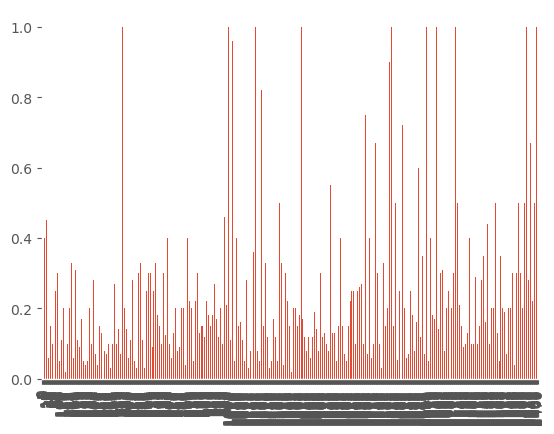

In [59]:
# creating a bar chart

df['percentage_laid_off'].plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

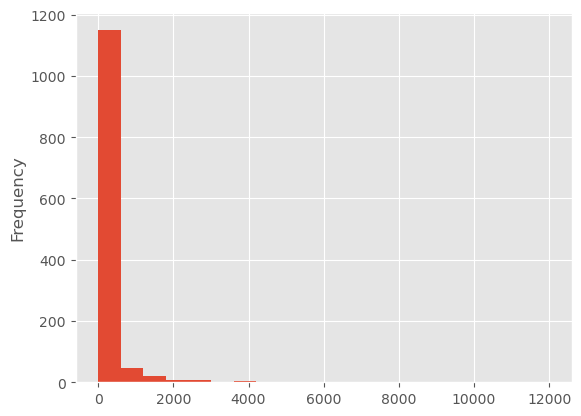

In [60]:
# trying a histogram

df['total_laid_off'].plot(kind='hist', bins=20)

In [61]:
# compare maybe different features

df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff
0,Pear Therapeutics,Boston,Healthcare,170.0,0.92,2023-04-07,United States,1
1,ZestMoney,Bengaluru,Finance,100.0,0.20,2023-04-07,India,1
2,Absolute Software,Vancouver,Security,40.0,0.05,2023-04-06,Canada,0
3,Avocargo,Berlin,Transportation,16.0,1.00,2023-04-06,Germany,0
4,Dunzo,Bengaluru,Food,300.0,0.30,2023-04-05,India,1


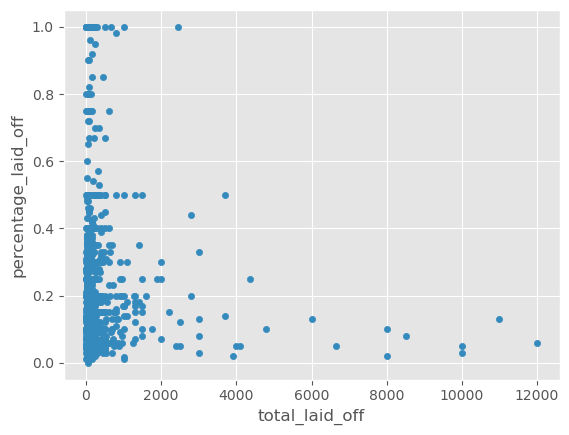

In [62]:
#compare % laid off vs total laid off with scatter plot

df.plot(kind='scatter', x= 'total_laid_off', 
        y= 'percentage_laid_off')
plt.show()

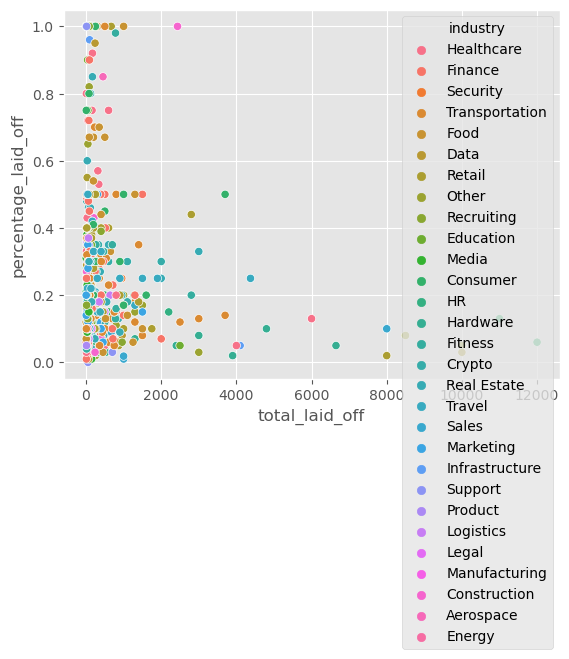

In [63]:
# using sns for a scatterplot that compares our industry, total laid off and percent laid off
sns.scatterplot(x= 'total_laid_off', 
        y= 'percentage_laid_off',
                hue='industry',
               data=df)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

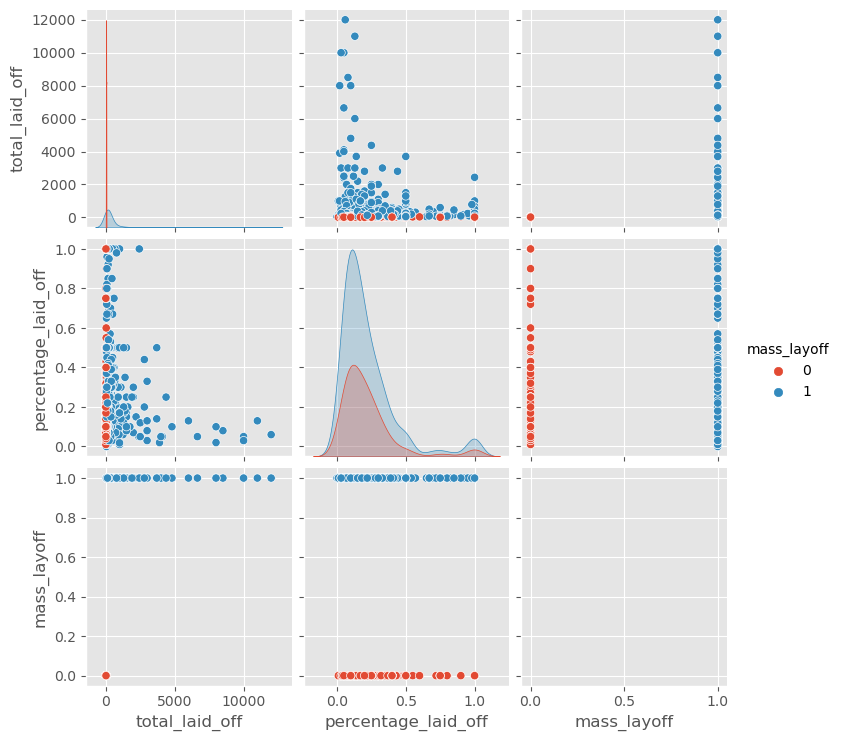

In [64]:
# using pairplot to look at multiple data

sns.pairplot(df, vars= ['total_laid_off', 'percentage_laid_off', 'mass_layoff'],
            hue= 'mass_layoff')
plt.show

In [65]:
# correlation with categories.  creating a df for just this purpose 

df_corr= df[['total_laid_off', 'percentage_laid_off', 'mass_layoff']].corr()

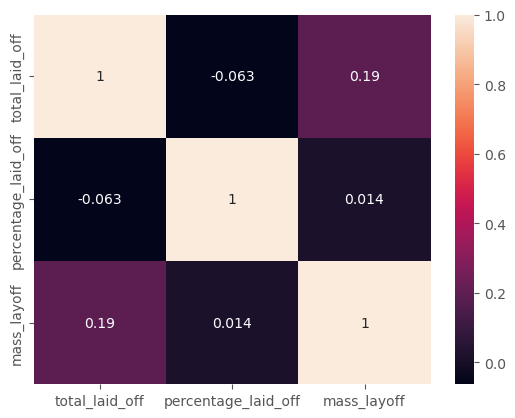

In [66]:
# heatmap
sns.heatmap(df_corr, annot=True)

plt.show()

In [70]:
# break down data in quarters.  start with 1 qtr of 2021 

df_2021_1qtr= df[(df['date']>"2020-12-31")&(df['date']<"2021-04-01")]

df_2021_1qtr.head(7)

# we only have 7 companies with layoffs during first qtr of 2021

,company,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff
1822,Bounce,Bengaluru,Transportation,200.0,0.40,2021-02-22,India,1
1825,Limelight,New York City,Recruiting,13.0,1.00,2021-02-04,United States,0
1826,Quandoo,Berlin,Food,87.0,0.20,2021-02-03,Germany,1
1827,Hubba,Toronto,Retail,45.0,1.00,2021-02-01,Canada,0
1831,Postmates,SF Bay Area,Food,180.0,0.15,2021-01-23,United States,1
1833,Pocketmath,Singapore,Marketing,21.0,1.00,2021-01-20,Singapore,0
1834,Dropbox,SF Bay Area,Other,315.0,0.15,2021-01-13,United States,1


In [69]:
# count our data set

df_2021_1qtr.count()

company                7
location               7
industry               7
total_laid_off         7
percentage_laid_off    7
date                   7
country                7
mass_layoff            7
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

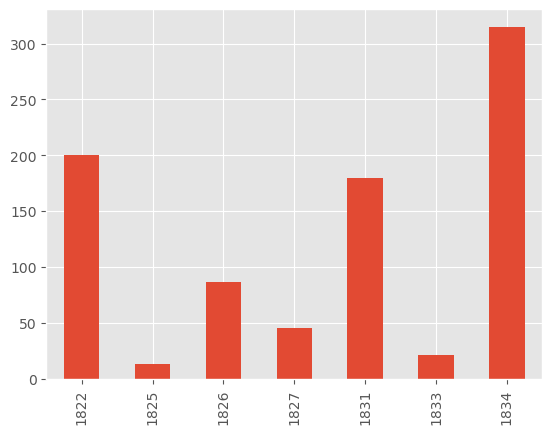

In [74]:
# creating a bar chart 2021 1qtr

df_2021_1qtr['total_laid_off'].plot(kind='bar', )

plt.show



<AxesSubplot:ylabel='Frequency'>

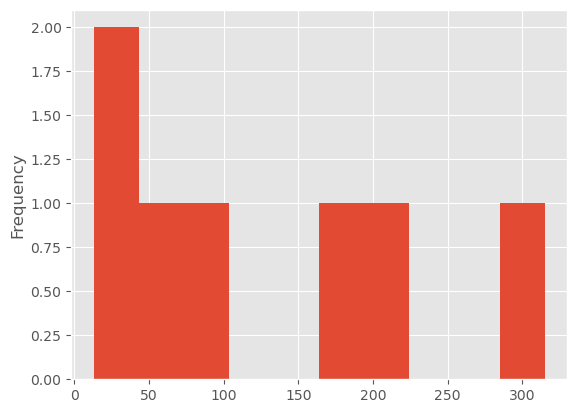

In [77]:
# trying a histogram

df_2021_1qtr['total_laid_off'].plot(kind='hist', bins=10)

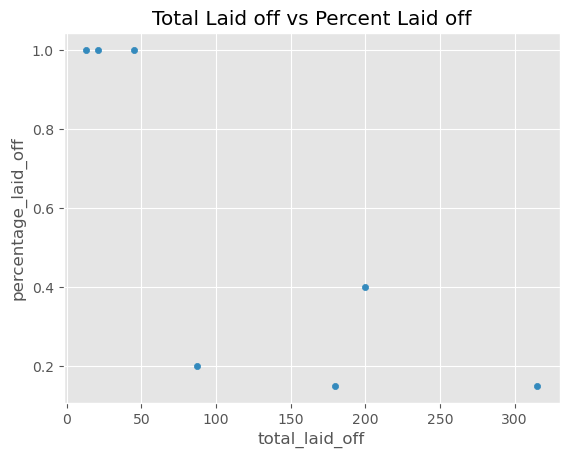

In [79]:
#compare % laid off vs total laid off with scatter plot

df_2021_1qtr.plot(kind='scatter', 
                  x= 'total_laid_off', 
                  y= 'percentage_laid_off',
                 title= 'Total Laid off vs Percent Laid off')
plt.show()

# the three companies that were 100% layoffs didn't have over 50 employees to be considered a mass layoff

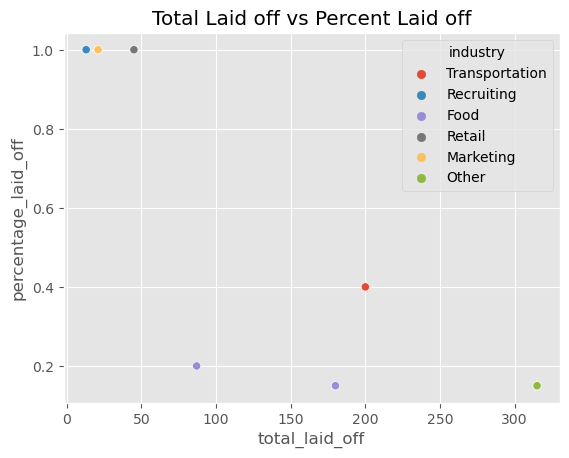

In [81]:
# using sns for a scatterplot that compares our industry, total laid off and percent laid off
ax= sns.scatterplot(x= 'total_laid_off', 
        y= 'percentage_laid_off',
                hue='industry',
               data=df_2021_1qtr)

ax.set_title('Total Laid off vs Percent Laid off')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

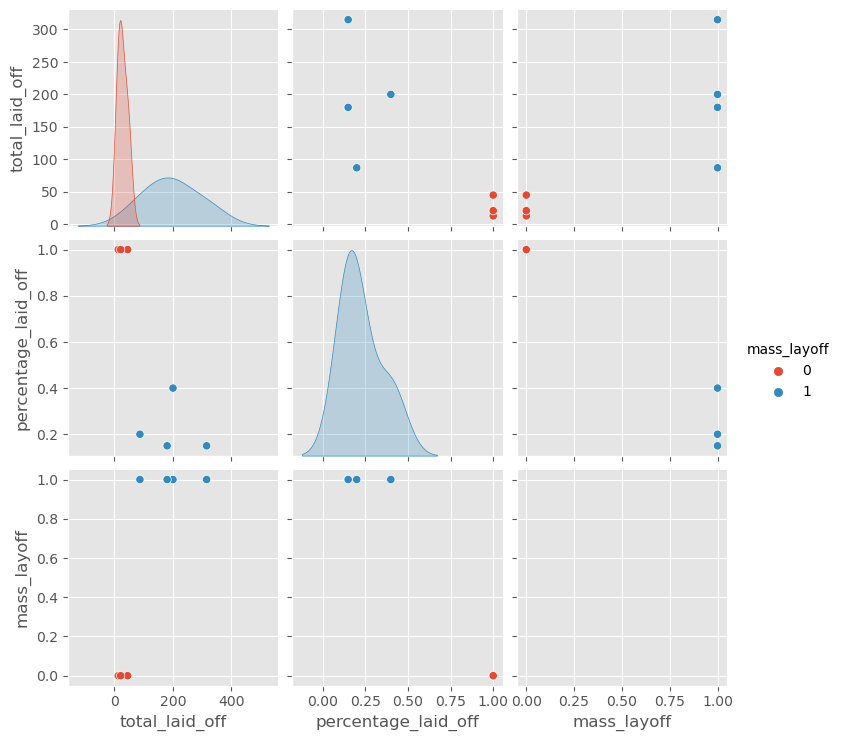

In [82]:
# using pairplot to look at multiple data

sns.pairplot(df_2021_1qtr, vars= ['total_laid_off', 'percentage_laid_off', 'mass_layoff'],
            hue= 'mass_layoff')
plt.show

In [84]:
# correlation with categories.  creating a df for just this purpose 

df_2021_1qtr[['total_laid_off', 'percentage_laid_off', 'mass_layoff']].corr()

,total_laid_off,percentage_laid_off,mass_layoff
total_laid_off,1.000000,-0.802802,0.803824
percentage_laid_off,-0.802802,1.000000,-0.979979
mass_layoff,0.803824,-0.979979,1.000000


In [88]:
# create 2021 1st qtr CSV

df_2021_1qtr.to_csv("2021_1st_qtr.csv", encoding="utf-8", index = False)

In [89]:
# create 2022 1st qtr

df_2022_1qtr= df[(df['date']>"2021-12-31")&(df['date']<"2022-04-01")]

df_2022_1qtr.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff
1762,Rasa,Berlin,Data,59.0,0.40,2022-03-30,Germany,1
1763,Gopuff,Philadelphia,Food,450.0,0.03,2022-03-29,United States,1
1764,Thinkific,Vancouver,Education,100.0,0.20,2022-03-29,Canada,1
1767,Storytel,Stockholm,Media,100.0,0.10,2022-03-17,Sweden,1
1769,Trell,Bengaluru,Retail,300.0,0.50,2022-03-15,India,1


In [97]:
# count our items

df_2022_1qtr.count()

company                18
location               18
industry               18
total_laid_off         18
percentage_laid_off    18
date                   18
country                18
mass_layoff            18
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

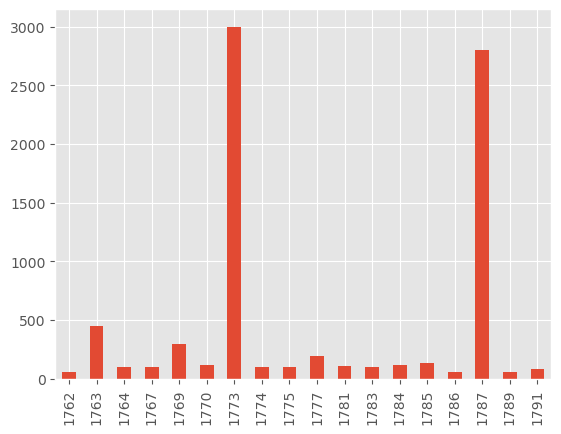

In [91]:
# creating a bar chart 2022 1qtr

df_2022_1qtr['total_laid_off'].plot(kind='bar', )

plt.show

<AxesSubplot:ylabel='Frequency'>

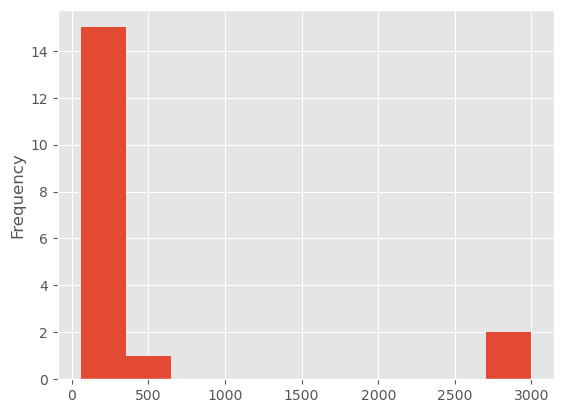

In [92]:
# histogram for 2022 1st qtr

df_2022_1qtr['total_laid_off'].plot(kind='hist', bins=10)

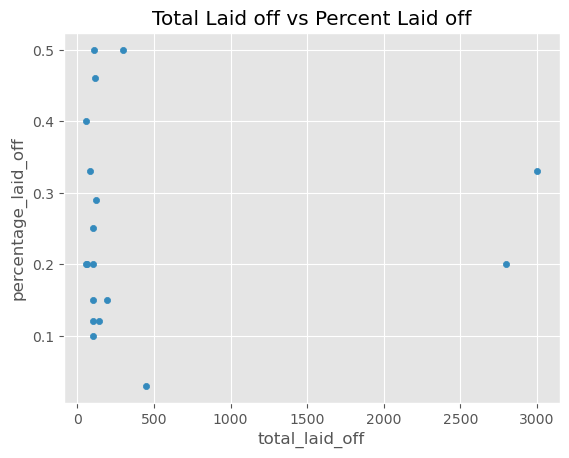

In [93]:
#compare % laid off vs total laid off with scatter plot

df_2022_1qtr.plot(kind='scatter', 
                  x= 'total_laid_off', 
                  y= 'percentage_laid_off',
                 title= 'Total Laid off vs Percent Laid off')
plt.show()


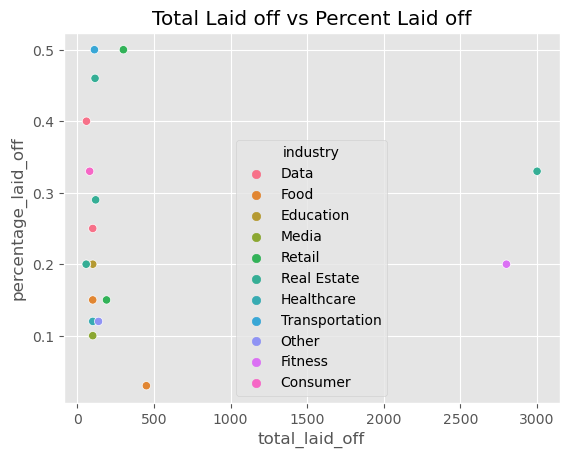

In [95]:
# using sns for a scatterplot that compares our industry, total laid off and percent laid off
ax= sns.scatterplot(x= 'total_laid_off', 
        y= 'percentage_laid_off',
                hue='industry',
               data=df_2022_1qtr)

ax.set_title('Total Laid off vs Percent Laid off')

plt.show()

In [98]:
# checking out 18 companies

df_2022_1qtr.head(18)
# every single layoff we have qualifies for a mass layoff.

,company,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff
1762,Rasa,Berlin,Data,59.0,0.40,2022-03-30,Germany,1
1763,Gopuff,Philadelphia,Food,450.0,0.03,2022-03-29,United States,1
1764,Thinkific,Vancouver,Education,100.0,0.20,2022-03-29,Canada,1
1767,Storytel,Stockholm,Media,100.0,0.10,2022-03-17,Sweden,1
1769,Trell,Bengaluru,Retail,300.0,0.50,2022-03-15,India,1
1770,Knock,New York City,Real Estate,115.0,0.46,2022-03-15,United States,1
1773,Better.com,New York City,Real Estate,3000.0,0.33,2022-03-08,United States,1
1774,Adaptive Biotechnologies,Seattle,Healthcare,100.0,0.12,2022-03-08,United States,1
1775,Hyperscience,New York City,Data,100.0,0.25,2022-03-03,United States,1
1777,Wish,SF Bay Area,Retail,190.0,0.15,2022-03-01,United States,1


<function matplotlib.pyplot.show(close=None, block=None)>

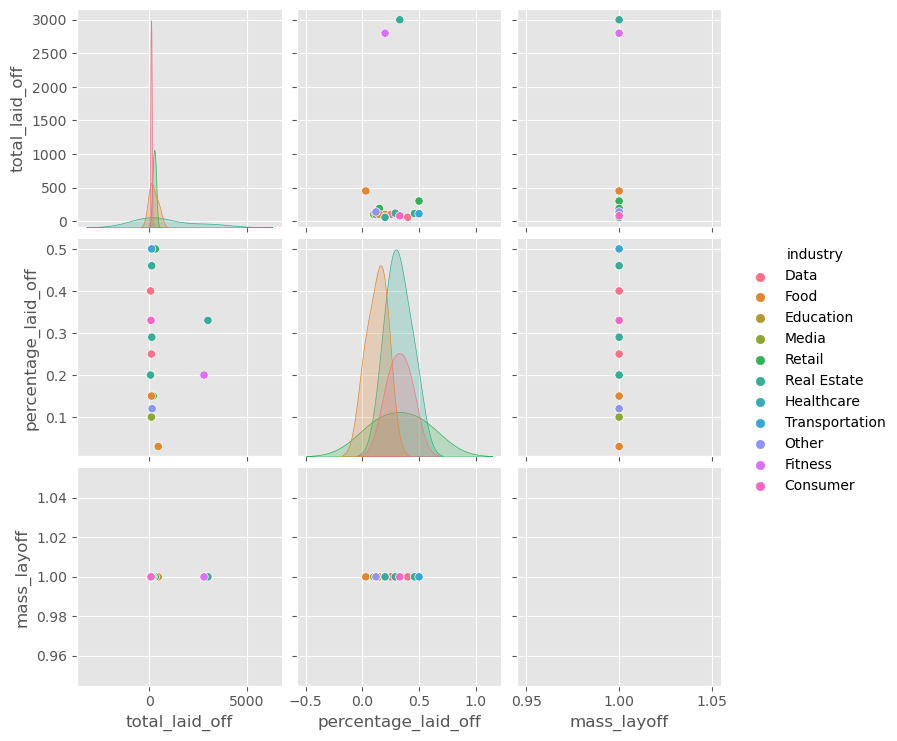

In [100]:
# using pairplot to look at multiple data sets for 2022 1st qtr

sns.pairplot(df_2022_1qtr, vars= ['total_laid_off', 'percentage_laid_off', 'mass_layoff'],
            hue= 'industry')
plt.show

In [101]:
# correlation with categories.

df_2022_1qtr[['total_laid_off', 'percentage_laid_off', 'mass_layoff']].corr()

,total_laid_off,percentage_laid_off,mass_layoff
total_laid_off,1.000000,0.022552,NaN
percentage_laid_off,0.022552,1.000000,NaN
mass_layoff,NaN,NaN,NaN
